In [2]:
%run 'utils.ipynb'
%matplotlib notebook

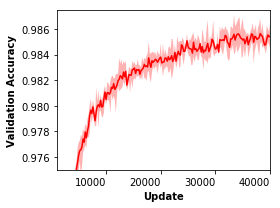

In [3]:
# Single worker results
df = (make_valacc_df(exp_id)[0] for exp_id in 
      ('mnist_single_seed1', 'mnist_single_seed2', 'mnist_single_seed3', 'mnist_single_seed4'))
df = (x[['Epoch', 'Update', 'seed', 'ValAcc']] for x in df)
df = (pd.pivot_table(x, index=['Update'], columns=['seed'], values='ValAcc')
      for x in df)
df = pd.concat(df, axis=1)
val_stats = df \
    .apply(pd.DataFrame.describe, axis=1) \
    [['mean', 'min', 'max']] \
    .reset_index()
fig, ax = plt.subplots(1, figsize=(4, 3))
# ax = df.plot(ax=ax)
ax.plot(val_stats['Update'], val_stats['mean'], label='Validation Accuracy', color='red')
ax.fill_between(val_stats['Update'], val_stats['min'], val_stats['max'], facecolor='red', alpha=0.3)
ax.set_ylabel('Validation Accuracy', fontweight='bold')
ax.set_xlabel('Update', fontweight='bold')
ax.set_ylim(0.975, 0.9875)
ax.set_xlim(1000, 40000)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('right')
plt.tight_layout()
plt.show()

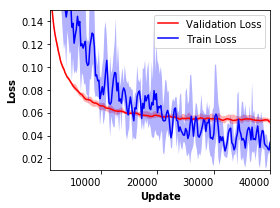

In [4]:
# Single worker - losses

df = (make_valloss_df(exp_id)[0] for exp_id in 
      ('mnist_single_seed1', 'mnist_single_seed2', 'mnist_single_seed3', 'mnist_single_seed4'))
df = (x[['Epoch', 'Update', 'seed', 'ValLoss']] for x in df)
df = (pd.pivot_table(x, index=['Update'], columns=['seed'], values='ValLoss')
      for x in df)
df = pd.concat(df, axis=1)
df = df.rolling(3, min_periods=2, center=True).mean()
val_loss_stats = df \
    .apply(pd.DataFrame.describe, axis=1) \
    [['mean', 'min', 'max']] \
    .reset_index()
    
df = (make_trainloss_df(exp_id)[0] for exp_id in 
      ('mnist_single_seed1', 'mnist_single_seed2', 'mnist_single_seed3', 'mnist_single_seed4'))
df = (x[['Epoch', 'Update', 'seed', 'TrainLoss']] for x in df)
df = (pd.pivot_table(x, index=['Update'], columns=['seed'], values='TrainLoss')
      for x in df)
df = pd.concat(df, axis=1)
df = df.rolling(3, min_periods=2, center=True).mean()
train_loss_stats = df \
    .apply(pd.DataFrame.describe, axis=1) \
    [['mean', 'min', 'max']] \
    .reset_index()

df = pd.merge(val_loss_stats, train_loss_stats, left_on=['Update'], right_on=['Update'], suffixes=('_val', '_train'))
fig, ax = plt.subplots(1, figsize=(4, 3))
ax.plot(df['Update'], df['mean_val'], label='Validation Loss', color='red')
ax.fill_between(df['Update'], df['min_val'], df['max_val'], facecolor='red', alpha=0.3)
ax.plot(df['Update'], df['mean_train'], label='Train Loss', color='blue')
ax.fill_between(df['Update'], df['min_train'], df['max_train'], facecolor='blue', alpha=0.3)
ax.legend()
ax.set_xlabel('Update', fontweight='bold')
ax.set_ylabel('Loss', fontweight='bold')
ax.set_ylim(0.01, 0.15)
ax.set_xlim(1000, 40000)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_horizontalalignment('right')
plt.tight_layout()
plt.show()

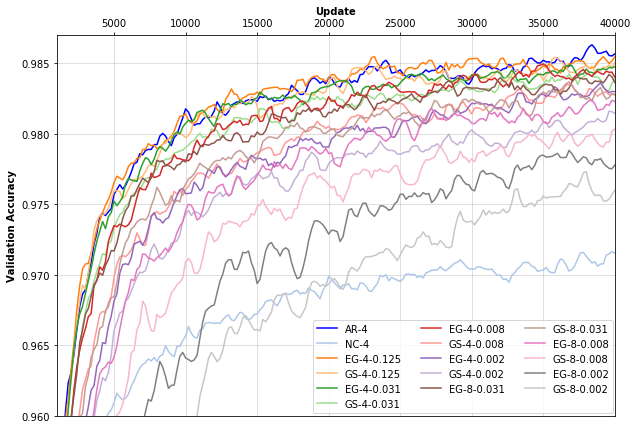

In [5]:
exp_ids = [
    ['mnist_grar_agg1_4', 'AR-4'],
    ['mnist_nocomm_4', 'NC-4'],
    ['mnist_elastic_gossip_aggprob8_alpha05_4', 'EG-4-0.125'],
    ['mnist_gopr_aggprob8_4', 'GS-4-0.125'],
    ['mnist_elastic_gossip_aggprob32_alpha05_4', 'EG-4-0.031'],
    ['mnist_gopr_aggprob32_4', 'GS-4-0.031'],
    ['mnist_elastic_gossip_aggprob128_alpha05_4', 'EG-4-0.008'],
    ['mnist_gopr_aggprob128_4', 'GS-4-0.008'],
    ['mnist_elastic_gossip_aggprob512_alpha05_4', 'EG-4-0.002'],
    ['mnist_gopr_aggprob512_4', 'GS-4-0.002'],
    ['mnist_elastic_gossip_aggprob32_alpha05_8', 'EG-8-0.031'],
    ['mnist_gopr_aggprob32_8', 'GS-8-0.031'],
    ['mnist_elastic_gossip_aggprob128_alpha05_8', 'EG-8-0.008'],
    ['mnist_gopr_aggprob128_8', 'GS-8-0.008'],
    ['mnist_elastic_gossip_aggprob512_alpha05_8', 'EG-8-0.002'],
    ['mnist_gopr_aggprob512_8', 'GS-8-0.002'],
]

_, ax = plt.subplots(1, figsize=(10, 7))
ax.set_ylim(0.96, 0.987)
ax.set_xlim(1000, 40000)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top') 
for i, (exp_id, label) in enumerate(exp_ids):
    plot_evolution(exp_id, ax=ax, legend_label=label, color_idx=i, acc_range=False, smooth=3)
plt.legend()
ax.legend(loc='lower right', bbox_to_anchor=(1.005, -0.005), ncol=3)
ax.grid(alpha=0.5)


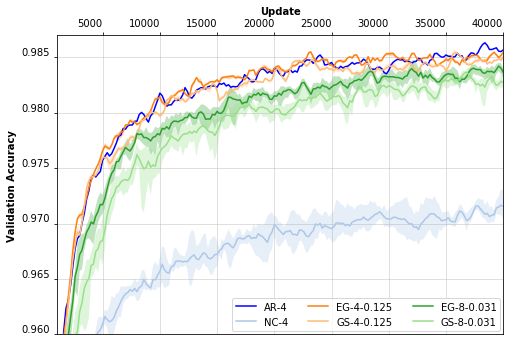

In [6]:
exp_ids = [
    ['mnist_grar_agg1_4', 'AR-4'],
    ['mnist_nocomm_4', 'NC-4'],
    ['mnist_elastic_gossip_aggprob8_alpha05_4', 'EG-4-0.125'],
    ['mnist_gopr_aggprob8_4', 'GS-4-0.125'],
    ['mnist_elastic_gossip_aggprob32_alpha05_8', 'EG-8-0.031'],
    ['mnist_gopr_aggprob32_8', 'GS-8-0.031'],
]

_, ax = plt.subplots(1, figsize=(8, 5.5))
ax.set_ylim(0.96, 0.987)
ax.set_xlim(1000, 40000)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top') 
for i, (exp_id, label) in enumerate(exp_ids):
    plot_evolution(exp_id, ax=ax, legend_label=label, color_idx=i, acc_range=True, smooth=3)
plt.legend()
ax.legend(loc='lower right', bbox_to_anchor=(1.005, -0.005), ncol=3)
ax.grid(alpha=0.5)
for tick in ax.xaxis.get_major_ticks():
    tick.label2.set_horizontalalignment('right')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_verticalalignment('bottom')

Text(0.05,0.5,'Validation Accuracy')

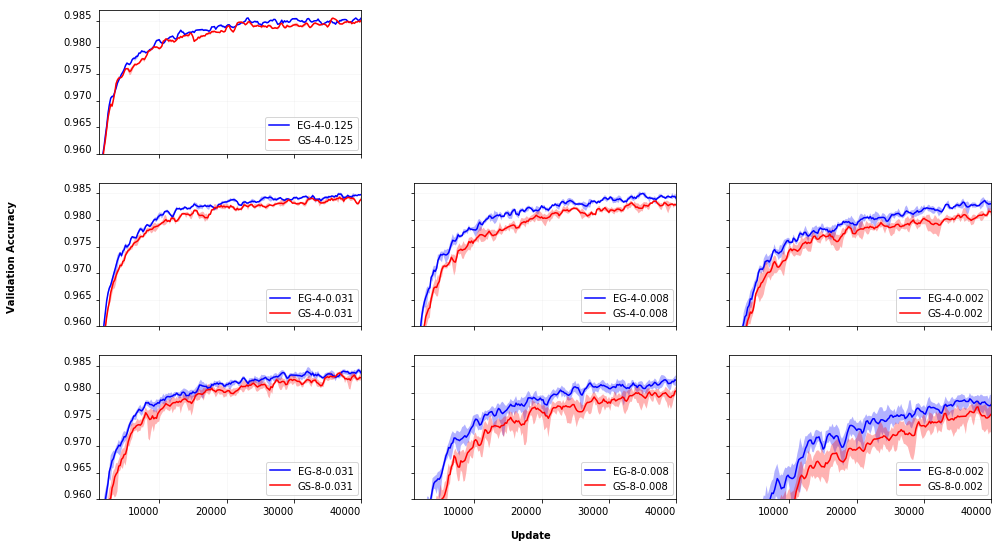

In [17]:
# exp_id_pairs = [
#     [
#         ['mnist_elastic_gossip_aggprob8_alpha05_4', 'EG-4-0.125'],
#         ['mnist_gopr_aggprob8_4', 'GS-4-0.125'],
#     ], [
#         ['mnist_elastic_gossip_aggprob32_alpha05_4', 'EG-4-0.031'],
#         ['mnist_gopr_aggprob32_4', 'GS-4-0.031'],
#     ], [
#         ['mnist_elastic_gossip_aggprob32_alpha05_8', 'EG-8-0.031'],
#         ['mnist_gopr_aggprob32_8', 'GS-8-0.031'],
#     ], [
#         ['mnist_elastic_gossip_aggprob128_alpha05_4', 'EG-4-0.008'],
#         ['mnist_gopr_aggprob128_4', 'GS-4-0.008'],
#     ], [
#         ['mnist_elastic_gossip_aggprob128_alpha05_8', 'EG-8-0.008'],
#         ['mnist_gopr_aggprob128_8', 'GS-8-0.008'],
#     ], [
#         ['mnist_elastic_gossip_aggprob512_alpha05_4', 'EG-4-0.002'],
#         ['mnist_gopr_aggprob512_4', 'GS-4-0.002'],
#     ], [
#         ['mnist_elastic_gossip_aggprob512_alpha05_8', 'EG-8-0.002'],
#         ['mnist_gopr_aggprob512_8', 'GS-8-0.002'],
#     ],
# ]

exp_id_pairs = [
    [
        ['mnist_elastic_gossip_aggprob8_alpha05_4', 'EG-4-0.125'],
        ['mnist_gopr_aggprob8_4', 'GS-4-0.125'],
    ], [
        ['mnist_elastic_gossip_aggprob32_alpha05_4', 'EG-4-0.031'],
        ['mnist_gopr_aggprob32_4', 'GS-4-0.031'],
    ], [
        ['mnist_elastic_gossip_aggprob128_alpha05_4', 'EG-4-0.008'],
        ['mnist_gopr_aggprob128_4', 'GS-4-0.008'],
    ], [
        ['mnist_elastic_gossip_aggprob512_alpha05_4', 'EG-4-0.002'],
        ['mnist_gopr_aggprob512_4', 'GS-4-0.002'],
    ], [
        ['mnist_elastic_gossip_aggprob32_alpha05_8', 'EG-8-0.031'],
        ['mnist_gopr_aggprob32_8', 'GS-8-0.031'],
    ], [
        ['mnist_elastic_gossip_aggprob128_alpha05_8', 'EG-8-0.008'],
        ['mnist_gopr_aggprob128_8', 'GS-8-0.008'],
    ], [
        ['mnist_elastic_gossip_aggprob512_alpha05_8', 'EG-8-0.002'],
        ['mnist_gopr_aggprob512_8', 'GS-8-0.002'],
    ],
]

# fig, axs = plt.subplots(4, 2, figsize=(8, 9.5), sharex=True, sharey=True)
fig, axs = plt.subplots(3, 3, figsize=(16, 9), sharex=True, sharey=True)
ax_list = [ax for ax_row in axs for ax in ax_row]
# usable = [ax for i, ax in enumerate(ax_list) if i != 1]
# fig.delaxes(ax_list[1])
usable = [ax for i, ax in enumerate(ax_list) if i != 1 and i != 2]
fig.delaxes(ax_list[1]); fig.delaxes(ax_list[2])
plt.locator_params(axis='x', nbins=4)
plt.ylim(0.96, 0.987)
plt.xlim(1000, 40000)

for ci, (exp_ids, ax) in enumerate(zip(exp_id_pairs, usable)):
    for i, (exp_id, label) in enumerate(exp_ids):
        color = 'blue' if i == 0 else 'red'
        plot_evolution(exp_id, ax=ax, legend_label=label, color=color, smooth=3)
    ax.legend(loc='lower right', bbox_to_anchor=(1.005, -0.005), ncol=1)
    ax.grid(alpha=0.1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_horizontalalignment('right')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_verticalalignment('bottom')
        
# x and y labels
fig.text(0.5,0.07, "Update", ha="center", va="center", fontweight='bold')
fig.text(0.05,0.5, "Validation Accuracy", ha="center", va="center", rotation=90, fontweight='bold')


Text(0.025,0.5,'Validation Accuracy')

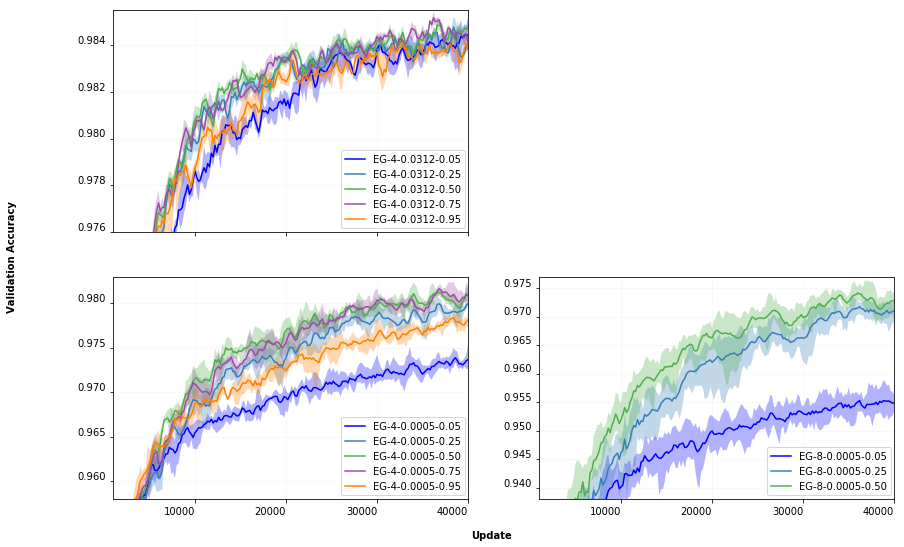

In [16]:
exp_id_tuples = [
    [
        ['mnist_elastic_gossip_aggprob32_alpha005_4', 'EG-4-0.0312-0.05'],
        ['mnist_elastic_gossip_aggprob32_alpha025_4', 'EG-4-0.0312-0.25'],
        ['mnist_elastic_gossip_aggprob32_alpha05_4', 'EG-4-0.0312-0.50'],
        ['mnist_elastic_gossip_aggprob32_alpha075_4', 'EG-4-0.0312-0.75'],
        ['mnist_elastic_gossip_aggprob32_alpha095_4', 'EG-4-0.0312-0.95'],
    ], [
        ['mnist_elastic_gossip_aggprob2048_alpha005_4', 'EG-4-0.0005-0.05'],
        ['mnist_elastic_gossip_aggprob2048_alpha025_4', 'EG-4-0.0005-0.25'],
        ['mnist_elastic_gossip_aggprob2048_alpha05_4', 'EG-4-0.0005-0.50'],
        ['mnist_elastic_gossip_aggprob2048_alpha075_4', 'EG-4-0.0005-0.75'],
        ['mnist_elastic_gossip_aggprob2048_alpha095_4', 'EG-4-0.0005-0.95'],
    ], [
        ['mnist_elastic_gossip_aggprob2048_alpha005_8', 'EG-8-0.0005-0.05'],
        ['mnist_elastic_gossip_aggprob2048_alpha025_8', 'EG-8-0.0005-0.25'],
        ['mnist_elastic_gossip_aggprob2048_alpha05_8', 'EG-8-0.0005-0.50']
    ]        
]

# fig, axs = plt.subplots(3, 1, figsize=(6, 10), sharex=True, sharey=False)
# ax_list = axs
# usable = ax_list

fig, axs = plt.subplots(2, 2, figsize=(14, 9), sharex=True, sharey=False)
ax_list = [ax for ax_row in axs for ax in ax_row]
usable = [ax for i, ax in enumerate(ax_list) if i != 1]
fig.delaxes(ax_list[1])

plt.locator_params(axis='x', nbins=4)
plt.xlim(1000, 40000)

for ci, (exp_ids, ax) in enumerate(zip(exp_id_tuples, usable)):
    for i, (exp_id, label) in enumerate(exp_ids):
        plot_evolution(exp_id, ax=ax, legend_label=label, color_idx=i, smooth=3, color_palette=cm.Set1)
    ax.legend(loc='lower right', bbox_to_anchor=(1.005, -0.005), ncol=1)
    if ci == 0:
        ax.set_ylim(0.976, 0.9855)
    elif ci == 1:
        ax.set_ylim(0.958, 0.983)
    else:
        ax.set_ylim(0.938, 0.977)
    ax.grid(alpha=0.1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_horizontalalignment('right')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_verticalalignment('bottom')
        
# x and y labels
fig.text(0.5,0.07, "Update", ha="center", va="center", fontweight='bold')
fig.text(0.025,0.5, "Validation Accuracy", ha="center", va="center", rotation=90, fontweight='bold')
